In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [3]:
nx = 11
nt = 6
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 0.5, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_sine'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

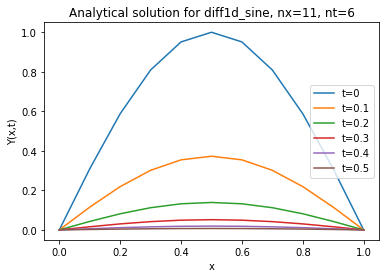

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s, nx=%d, nt=%d' % (eq_name, nx, nt));

## BFGS (default)

In [6]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

         Current function value: 0.004443
         Iterations: 4577
         Function evaluations: 4999
         Gradient evaluations: 4987
8min 32s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 0.004443370314085523
 hess_inv: array([[ 3.11307379e+05,  4.76582868e+02,  1.44140464e+03, ...,
         5.32890322e+06, -3.79137869e+06,  6.38620042e+06],
       [ 4.68717665e+02,  3.12467885e+01,  4.34885013e+00, ...,
         7.93065774e+03, -5.68921359e+03,  9.65497655e+03],
       [ 1.44089830e+03,  4.38247686e+00,  6.88866765e+00, ...,
         2.46581949e+04, -1.75465653e+04,  2.95601783e+04],
       ...,
       [ 5.32893189e+06,  8.06561295e+03,  2.46669782e+04, ...,
         9.12207921e+07, -6.49011003e+07,  1.09319038e+08],
       [-3.79138902e+06, -5.78522495e+03, -1.75527699e+04, ...,
        -6.49009270e+07,  4.61753195e+07, -7.77775739e+07],
       [ 6.38620286e+06,  9.81670740e+03,  2.95705670e+04, ...,
         1.09318488e+08, -7.77773907e+07,  1.31008265e+

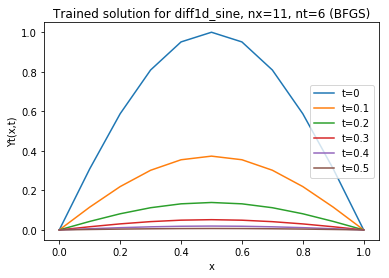

In [7]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s, nx=%d, nt=%d (%s)' % (eq_name, nx, nt, trainalg));

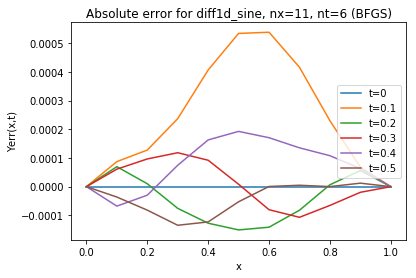

In [8]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s, nx=%d, nt=%d (%s)' % (eq_name, nx, nt, trainalg));

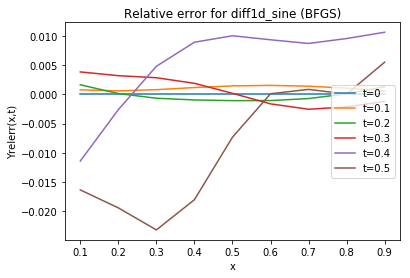

In [9]:
Yt1copy = np.copy(Yt1).reshape(nt, nx)
Yacopy = np.copy(Ya).reshape(nt, nx)
Yt1sub = Yt1copy[:, 1:-1]   # Skip first column
Yasub = Yacopy[:, 1:-1]     # Skip first column
Yrelerr = (Yt1sub-Yasub)/Yasub
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s)' % (eq_name, trainalg));